In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D, Conv2D
from sklearn.model_selection import train_test_split


In [38]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
import cv2
import os

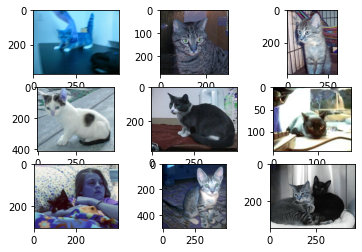

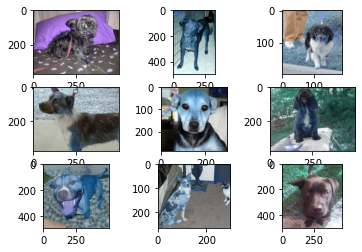

In [14]:
 folder = 'C:/Users/Admin/OneDrive/Documents/Machine learning/dog_cat_classification/PetImages/'
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + "Cat/" + str(i) + '.jpg'
    image = cv2.imread(filename)
    plt.imshow(image)
plt.show()
print('         ==============================')
for i in range(9):
    plt.subplot(330 + 1 + i)
    filename = folder + 'Dog/' + str(i) + '.jpg'
    image = cv2.imread(filename)
    plt.imshow(image)
plt.show()

In [24]:
train_dataset_path = 'C:/Users/Admin/OneDrive/Documents/Machine learning/dog_cat_classification/PetImages/'
train_ratio = 0.75
sub_dirs = ['train/', 'test/']
class_dirs = ['dogs/', 'cats/']

# restructure for easy create dataset with ImageDataGenerator
for sub in sub_dirs:
    for class_dir in class_dirs:
        os.makedirs(train_dataset_path + sub + class_dir, exist_ok=True)

     # Random 75% to train and 25% to test
cats = glob.glob(train_dataset_path + 'Cat/*')
dogs = glob.glob(train_dataset_path + 'Dog/*')
random.shuffle(dogs)
random.shuffle(cats)
cat_trains = cats[:int((len(cats)+1)*train_ratio)]
dog_trains = dogs[:int((len(dogs)+1)*train_ratio)]
cat_tests = cats[int((len(cats)+1)*train_ratio):] 
dog_tests = dogs[int((len(dogs)+1)*train_ratio):]
print("Train with Dog: {}, Cat: {}".format(len(dog_trains), len(cat_trains)))
print("Test with Dog: {}, Cat: {}".format(len(dog_tests), len(cat_tests)))

Train with Dog: 9376, Cat: 9376
Test with Dog: 3125, Cat: 3125


In [21]:
import random
import glob
import shutil

In [27]:

for path in cat_trains: shutil.move(path, train_dataset_path + sub_dirs[0] + class_dirs[1] )
for path in dog_trains: shutil.move(path, train_dataset_path + sub_dirs[0] + class_dirs[0] )
for path in cat_tests: shutil.move(path, train_dataset_path + sub_dirs[1] + class_dirs[1] )
for path in dog_tests: shutil.move(path, train_dataset_path + sub_dirs[1] + class_dirs[0] )


In [28]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = train_datagen.flow_from_directory('C:/Users/Admin/OneDrive/Documents/Machine learning/dog_cat_classification/PetImages/train/', 
                                             class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = test_datagen.flow_from_directory('C:/Users/Admin/OneDrive/Documents/Machine learning/dog_cat_classification/PetImages/test/', 
                                           class_mode='binary', batch_size=64, target_size=(200, 200))


Found 18749 images belonging to 2 classes.
Found 6249 images belonging to 2 classes.


In [ ]:
model.fit(train_it,steps_per_epoch=len(train_it),
          validation_data=test_it,validation_steps=len(test_it), epochs=50, verbose=1)

In [6]:
from tensorflow.keras.models import load_model

In [7]:
model=load_model('dog_cat_classification.h5')

In [8]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image,channels=3)
  image = tf.image.resize(image,(200,200))
  image /=255.0
  return image

In [9]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image 

In [10]:
import tensorflow as tf

In [11]:
image_paths = r"C:\Users\Admin\OneDrive\Pictures\dũng.jpg"



In [12]:
def predict_result(image_paths):
    images=tf.io.read_file(image_paths)
    images=preprocess_image(images)
    pre=model.predict(np.array([images]))
    if pre >0.5: print('Chó')
    else: print('Mèo')

In [13]:
predict_result(image_paths)

NameError: name 'np' is not defined